In [3]:
import numpy as np
from classy import Class

import matplotlib
from matplotlib import pyplot as plt

from utilities_NEW import *
%matplotlib inline

import os

In [4]:
params = read_ini_file('example_axiCLASS.ini', loc='/Users/saravannah/Axion-MCMC/axion_MCMC/')
params['n_axion'] = 3
print('log10_axion_ac is ', params['log10_axion_ac'])
print('log10_fraction_axion_ac is ', params['log10_fraction_axion_ac'])
print('omega_cdm is ', params['omega_cdm'])
print('H0 is ', params['H0'])

params['log10_axion_ac'], params['log10_fraction_axion_ac'], params['omega_cdm'], params['H0'] = -4.094040112604460546e+00, -1.007748909068430843e+00, 1.239595790035708661e-01, 7.213391555930220989e+01
cosmo = Class()
cosmo.set(params)

#cosmo.set({'output':'tCl,pCl,lCl'})

cosmo.compute()

output = cosmo.raw_cl(2000)#lensed_cl(2000)

ls = output['ell'][90:]
#ls = np.arange(90,2001)

Cls = output['tt'][90:]

Dls = ls*(ls+1)*Cls/(2*np.pi)

cosmo.struct_cleanup()
cosmo.empty()

log10_axion_ac is  -3.531
log10_fraction_axion_ac is  -0.879426
omega_cdm is  0.1320
H0 is  72.81


In [5]:
directory = os.getcwd()
fileName = os.path.join(directory,'planck/planck_tt_spectrum_2018.txt')
l_data, Dl_data, Dl_data_err_lo, Dl_data_err_hi = np.loadtxt(fileName, unpack = True)

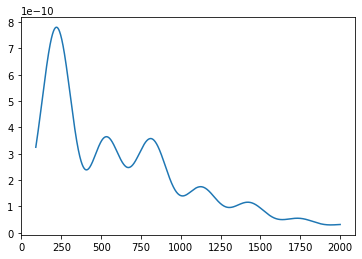

In [6]:

plt.plot(ls, Dls)
#plt.plot(l_data, 2*np.pi*Dl_data/(l_data*(l_data+1)))

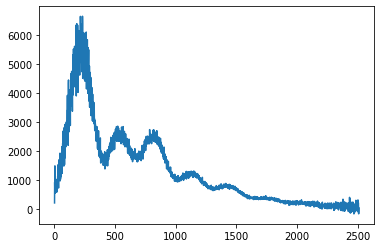

In [7]:
plt.plot(l_data, Dl_data)

In [8]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':5000,
                   'P_k_max_1/Mpc':10.0,
                   'gauge':'newtonian'}

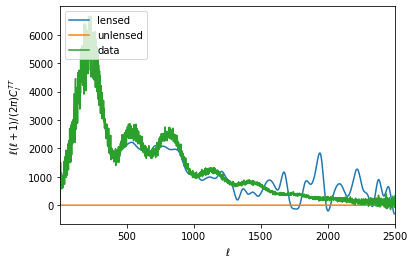

In [10]:
#this is from a Thomas Tram example notebook
#https://github.com/ThomasTram/iCLASS/blob/master/SolutionExercises2018.ipynb


#unlensed is right, lensed isn't
#AxiCLASS must do something weird to lensing


#CLASS uses natural units, have to change to muK^2 to match Planck
T_cmb = 2.7255e6 #uK

cosmo = Class()
cosmo.set({'output':'tCl,pCl,lCl','lensing':'yes','modes':'s,t','r':'0.2'})#set(common_settings)#
cosmo.compute()

raw_cl = cosmo.raw_cl()
lensed_cl = cosmo.lensed_cl()
lr = raw_cl['ell']
factor_raw = lr*(lr+1)/(2*np.pi)
ll = lensed_cl['ell']
factor_lensed = ll*(ll+1)*T_cmb**2/(2*np.pi)

#plt.loglog(lr,factor_raw*raw_cl['bb'],label='unlensed')
#plt.loglog(ll,factor_lensed*lensed_cl['bb'],label='lensed')
#plt.loglog(l_data, Dl_data, label='data')

plt.plot(ll,factor_lensed*lensed_cl['tt'],label='lensed')
plt.plot(lr,factor_raw*raw_cl['tt'],label='unlensed')
plt.plot(l_data, Dl_data, label='data')


plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/(2\pi) C_l^{TT}}$")
plt.legend(loc='upper left')
plt.xlim([2,2500])

cosmo.struct_cleanup()
cosmo.empty()